# Functions, D&D

Functions are some of the most useful classes of objects in any high level programming language, and Python is no exception!  In very basic terms, a function accepts inputs, performs operations on them, and returns outputs.  The classic idea we all have of a function is something like y is a function of x for example,

$$y(x) = 2x + 5$$

This is a simple *univariate scalar* function. We call it univariate because it has only one argument (x).  We call it scalar because for a given input of x, it returns a single output value for y. But we will see in a moment that functions are far more general and flexible.  In Python, we follow a few important rules to define a function. 

## Function syntax

To start, you declare a function with the **def** keyword, and you always use the following syntax:

```python
def function_name(inputs):
```
    
Where `function_name` can be anything you want it to be, and `inputs` can be zero, one, or more arguments that you will provide to the function in order for it to perform its operations. Of the parts you see here, the only things that are non negotiable in a function definition are `def` and `:` 

**The next bit is important:** Every line after the first one in the function (the one with `def` and `:` in it), all the way up to the end of your function, *must be indented from the left margin*. This is the same syntax as `if` statements, `for` loops, and `while` loops. If a line is indented beyond the `def` keyword, that means that line is inside of the function's scope.  Once you return to the left margin, you are no longer writing code inside of that function. Python uses indentation to define a function scope instead of something like an **end** keyword that you see in many languages. In Python, indentation is what distinguishes a bit of code from being inside of a function (or loop) and being outside of that function (or loop). Typically a good editor will auto-indent the next line for you once it sees a : at the end of a line.  Jupyter, for example, does this by default.

**It is also important to know**:  if you want a function to accept an input from you, you have to specify which inputs you will give it.  Conversely, if you want it to return an output, you will need to tell it which outputs to return.

<div class = "alert alert-block alert-info">
    <b>Note</b>: If you do not specify what the function returns in Python, it will return the last thing computed by the function as the default return.
    </div>

This is accomplished in the cell below.  It will create a function called `y1` that accepts an input, which is called `x` locally inside of the function. It uses that value of `x` to perform the required operations, and it returns the value of `result` as an output.

In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt    

In [32]:
def y1(x):
    result = 2*x + 5
    return result

## It is helpful to think like a computer

Let's get used to thinking through how a piece of code will work - you really cannot learn to program until you understand how code is executed, so this is good practice. In this example, any time I want to evaluate the answer for y(x), I give a value of x to the function, i.e., I provide the necessary **input** to my function. The function then computes the "result" for that value of the input using whatever operations I specify, and then it **returns** that result as its **output**. I can set that result equal to a variable, I can print it to the screen, and I can use it for all manner of operations once I've run the function. This is a fairly easy function to evaluate, and I can see that for x = 10, this function should give me the result that y = 25.  Let's try it in the cell below; we'll pass the arugment 10 to our function y(x) and see what it returns. You pass an argument to a function using parentheses **()** in Python--pay attention to how this looks different from passing an index to an array using brackets **[]**:

In [33]:
y1(10)

25

## Binding the output of a function to a variable

Frequently, you'll want to store the result of that function in a new variable.  I would do this just as I would when defining a number; this will  store a new variable called "output" to the workspace (type `%whos` to confirm).  It will have a value of 25.

In [34]:
output = y1(10)
%whos

Variable                    Type        Data/Info
-------------------------------------------------
A                           int         3
B                           int         15
C                           int         42
animal                      str         koala bear
attribute                   str         whiskerine
averages                    list        n=488
base                        int         34
bonus                       int         6
coat_of_arms                list        n=4
color                       str         gold
counter                     list        n=488
d                           int         4
damage                      int         40
detail                      str         The Icy Sea
f                           function    <function f at 0x000001DB1C4903A0>
generator                   function    <function generator at 0x000001DB1C3BD430>
i                           int         487
index                       list        n=4
kingdom              

## lambda functions

Most languages will allow you to define an inline or anonymous function. In Python, these are called lambda functions. These are functions that you can write without going through the `def`, `:`, indent syntax outlined above. A key feature of a lambda function is that we do not have to bind it to a variable or function name (though you are not prevented from doing so).

In general, lambda function definitions are best suited to simple functions, of which the above qualifies.  I can write y2(x) using the lambda function syntax as shown in the cell below, and then I can pass an input value for x just as I normally would.
Because lambda functions are generally written as one liners, they are best suited to simple functions of one or two variables; however, they are extremely useful in many situations, so you'll want to understand their syntax and how to construct lambda functions.

In [35]:
y2 = lambda x: 2*x + 5
y2(10)

25

## Multivariate Functions

We definitely need to learn how to create a function that takes more than one argument.  For example, we can define the following *multivariate* scalar function. We call it multivariate because it has multiple arguments (x,y), but it is scalar because it returns a single value of p for any (x,y) pair.

$$p(x,y) = x^2 + y^2 + 10$$

Using lambda function syntax, this, we can pass values of (x, y) = (10, 10) to get 210:

In [36]:
p1 = lambda x, y: x**2 + y**2 + 10
p1(10,10)

210

That function could alternatively be defined in the conventional, long format. Functionally, these are the same, and you should use whichever is more convenient and/or readable for the program that you're writing.

In [37]:
def p2(x,y):
    return x**2 + y**2 + 10
p2(10, 10)

210

## Broadcasting a function to elements in a collection

Frequently, it will be of interest to pass sets of inputs instead of single values to a function. For example, let's say I wanted to evaluate our functions y1(x) and p2(x,y) for 10 element *collections* of x and y values.

Specifically, for x, we want the 10 floating point numbers between 0 and 10 (inclusive of both limits), and for y, we want the 10 floating point numbers from 2 to 5 (inclusive of both limits).  Here, we have to make some decisions about the type of collection we want to use. 

In base Python, you might use ***ranges*** and ***lists***, but broadcasting a function elementwise to each item in the list will require some type of loop or comprehension (See Module 04).  

The easiest solution in Python is *probably* to build x and y as numpy arrays and pass them as arguments to our functions.  Recall that math operations, by default, operate element-wise on a numpy array.  This applys when we pass a numpy array as a function argument. We can create these collections pretty easily using `np.linspace()`. Remember to print both arrays to confirm they include the values you want.

In [38]:
xvals = np.linspace(0, 1, 10)  
yvals = np.linspace(2, 5, 10)
print(xvals)
print(yvals)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.        ]


We can generally pass them to a function and have our function operate on each element in the array without using something like a loop or a comprehension.  This ends up being very convenient in most of our course; hence the recommendation to *usually* work with numpy arrays in engineering courses. 

You *can* use lists or tuples to do this, but in those cases, you'll probably need to write a loop to evaluate the function at each point; numpy arrays are much cleaner for broadcasting operations to multiple entires in a collection.

Because we have defined xvals and yvals as numpy arrays, we can pass either of these directly into our functions, and have them return collections of outputs.  In other words, they are now vector functions because we are passing vectors (arrays) of inputs to them.  Try evaluating:

You should see that what this is doing is evaluating your function for every value in the arrays that you're passing into the function.  This is super useful!!!  

In [39]:
print(y1(xvals))
print(p2(xvals, yvals))

[5.         5.22222222 5.44444444 5.66666667 5.88888889 6.11111111
 6.33333333 6.55555556 6.77777778 7.        ]
[14.         15.45679012 17.16049383 19.11111111 21.30864198 23.75308642
 26.44444444 29.38271605 32.56790123 36.        ]


## Wait...How would you do this with a list??

Just so you recognize that it is an issue, let's say I wanted to pass the following set of values into my function y1(x), and I naively create it as a list, thinking that I can pass it directly as a function argument:

```python
xlist = [1, 3, 7, 10]
y1(xlist)
```
    
You will get an error because lists do not work with element-wise, "vectorized" operations by default.  You would have to use a loop to work with this as a list.  Hence, numpy arrays are slightly cleaner for the type of work we usually do. It's worth knowing how to handle this situation since it can be a very useful skill. This can be done with a for loop:

In [40]:
xlist = [1, 3, 7, 10]
y_out = []
for value in xlist:
    y_out.append(y1(value))
y_out

[7, 11, 19, 25]

Or, once you get the hang of it, the generally preferred way to do this in Python is with a comprehension:

In [41]:
y_out = [y1(value) for value in xlist]
y_out

[7, 11, 19, 25]

## More complex functions, multiple operations and outputs

The above are all fine examples of functions, but I want everyone to learn to think more abstractly about what functions are and what they can do, so we need to break the habit of always thinking that by "function" we mean some sort of "polynomial" as in the examples above.  

The general definition, again, is that functions are code modules that take inputs and use those inputs to generate and return outputs. They can be very large and complex, they can take many inputs, they can do lots of different operations, and they can return many outputs.

So let's try something more complex - we will create a function called **f** that takes x, y, and z as inputs; uses those inputs to calculate the corresponding values of A, B, and C; and returns A, B, and C as outputs. Technically, it will (by default) return a tuple of comma separated values for A, B, and C unless we specify otherwise.

In [42]:
def f(x, y, z):
    A = x + y
    B = A*5
    C = z**3 + B
    return A, B, C

If you prefer to return a list, a numpy array, or something else, you'd need to specify that in the function; for example:

```python
def f2(x, y, z):
    A = x + y
    B = A*5
    C = z**3 + B
    return [A, B, C]  #This will give you a list with A, B, and C as its elements

def f3(x, y, z):
    A = x + y
    B = A*5
    C = z**3 + B
    return np.array([A, B, C])  #Numpy array with A, B, and C as its elements. 
```

Now that I've defined the function, I can use it function to calculate A, B, and C for x = 1, y = 2, and z = 3.  As the next example shows, you must define the outputs if you want to store them in the workspace; otherwise, the function will just return them without storing the values. Try this example in the cell below for x, y, z = 1, 2, 3; it should return three numbers, the last of which is, by pure serendipity, the answer to the ultimate question of life, the universe, and everything. Confirm that you are getting the correct result before proceeding.

In [43]:
print(f(1, 2, 3))
%whos

(3, 15, 42)
Variable                    Type        Data/Info
-------------------------------------------------
A                           int         3
B                           int         15
C                           int         42
animal                      str         koala bear
attribute                   str         whiskerine
averages                    list        n=488
base                        int         34
bonus                       int         6
coat_of_arms                list        n=4
color                       str         gold
counter                     list        n=488
d                           int         4
damage                      int         40
detail                      str         The Icy Sea
f                           function    <function f at 0x000001DB1CCAB8B0>
generator                   function    <function generator at 0x000001DB1C3BD430>
i                           int         487
index                       list        n=4
kingdom  

In [44]:
A, B, C = f(1, 2, 3)  #We can get A, B, and C assigned separately this way.
print(A, B, C)
%whos

3 15 42
Variable                    Type        Data/Info
-------------------------------------------------
A                           int         3
B                           int         15
C                           int         42
animal                      str         koala bear
attribute                   str         whiskerine
averages                    list        n=488
base                        int         34
bonus                       int         6
coat_of_arms                list        n=4
color                       str         gold
counter                     list        n=488
d                           int         4
damage                      int         40
detail                      str         The Icy Sea
f                           function    <function f at 0x000001DB1CCAB8B0>
generator                   function    <function generator at 0x000001DB1C3BD430>
i                           int         487
index                       list        n=4
kingdom      

OK: that function is objectively more interesting, but it is still relatively *boring* as things go...and it only hints at the flexibility of functions and the things that they are capable of doing. 

## What is your Coat of Arms anyway\? 

**It's also educational to combine things...like functions, random number generation, and list comprehensions.**

I was trying to come up with a fun and completely general example of something you can do with a function...and it occurred to me that you never know when you will need a set of polyhedral dice (that means many sided dice) on a moment's notice.  You may have none on hand and really need to roll a d12 for something. 

Seriously, **Has this ever happened to you?**  

Sure, you can Google something. But how about we impress...*almost no one*...by writing our own dice roller in Python?  

We will do this using a function. This function will accept two inputs from you:  The number of **sides** that your dice have, and the number of **dice** you wish to roll. It will produce one output: a list of your dice rolls. First, though, we have to learn a few things and import a new module.  

#### Random number generation

Dice are randomizers - rolling them selects a random integer between 1 and the number of sides that the die has. For example, if you roll a 6-sided die (a d6), it has an equal probability (1 out of 6) of returning 1, 2, 3, 4, 5, or 6.  We can mimic this by using a random integer generator that selects from the integers 1 to 6. To my knowledge, there is not a random number generator in base Python (though there might be), but I do know that there is one in the "random" package.  Since this isn't in base Python by default, we need to import it.

To start, let's import the random package by typing the following in the cell below.

In [45]:
import random

#### Generating random integers in a range (roll the dice)

Now that we have imported this package, we can use the modules included in that package.  The one we are interested in is called `random.randint()`.  We want `random.randint()` here because it returns integers, which is the same as a dice roll. `random.randint()` takes two inputs - the smallest number you want included in your random set (we will call this **a**), and the largest number you want included in your random set (we will call this **b**). **Note** unlike ranges, `randint()` includes both endpoints!

When you want to generate a random integer between (and including) a and b, you would type:

```python
random.randint(a,b)
```

Try it in the cell below for a single d6, for which a = 1 and b = 6.

In [46]:
random.randint(1,6)

1

#### How about you roll the dice a lot of times...

OK, so that gives us a result for a single dice roll for a d6.  Now let's abstract this idea a bit and create a function that will allow us to roll any type of die we want as many times as we want.  

The core of this function is going to be a list comprehension. Recall from Module 04 that list comprehensions provide a concise way to create a list of numbers easily using any (relatively simple) operation that you have in mind. In the first exercise, we used them to generate a large list of squares and to convert a list of integers into strings...but we can just as easily use it to create a list of random integers between (and including) **a** and **b**...or, relevant here, a set of 15 rolls on a d6:


This is accomplished in the cell below using a list comprehension that is making 15 random rolls for each element in the iterable `range(1,16)`, and it stores each one in a list called **roll**. As usual, `range()` excludes the upper limit from iterations, so we go to 16 instead of 15.  

Try it out in the cell below; if you print the result, you should see a set of 15 random numbers all between (and including) 1 and 6.

In [47]:
roll = [random.randint(1,6) for i in range(1,16)]
print(roll)

[6, 4, 1, 2, 4, 5, 1, 2, 5, 6, 2, 5, 2, 2, 2]


#### Let's make this more flexible so that we can roll things other than a d6

Now we're getting somewhere!  Let's see if we can put that list comprehension inside of a function in a way that will let us use this function to calculate any number of roll outcomes for any type of die. To do this, we will construct a function that takes two inputs from us:  the number of **sides** that our dice have, and the number of **dice** we want to roll. Then we use our list comprehension and random integer generator to get the result of those dice rolls. The way I have written this range will give me the exact number of rolls I want, i.e., the range between the first roll (1) and up to but not including the last roll (dice+1).  The result is a number of rolls = dice as desired. Go ahead and define this function in the cell below.

In [48]:
def roller(sides, dice):
    roll  = [random.randint(1, sides) for i in range(1, dice+1)]
    return roll

#### Now you have a fully functioning dice roller

To use that function, we just need to give it the number of sides and the number of dice.  Let's try it out for rolling **4d12** (that's rolling a 12 sided die four times), **6d6**, **2d10**, and, just for fun, **3d39** in the cell below.  For example, to roll 4d12, you would type:

```python
roller(12,4)
```
    
Try it for all the dice/sides combinations given above, and print your results to the screen, and then consult the next markdown cell...

In [49]:
roller(20, 5)

[20, 13, 7, 13, 18]

#### Generate a coat of arms

Now, let's use the dice roller to generate a set of random indices that will determine the all-important **coat of arms for our guild**. To do this, we will roll **4d20** and then cross reference the results with a couple of lists that are pre-generated in the cell below. Go ahead and run the next cell to store the lists, and then we will talk more about using the dice roller.

In [50]:
list1 = ['red', 'orange', 'blue', 'gold', 'cornflower', 'burnt sienna','umber', 'silver', 'electric purple', 'puce', 'cyan', 'magenta', 'mountain dew yellow', 'cheeto orange', 'green', 'yellow', 'azure', 'cornsilk', 'brown', 'teal']
list2 = ['wolf', "Pere David's deer",'tasmanian tiger','tardigrade','komodo dragon', 'bass', 'falcon', 'chtulu', 'billy-bumbler', 'raccoon', 'koala bear', 'banty rooster', 'dire mouse', 'gazelle', 'moon bear', 'tepezcuintle', 'pudu deer', 'Gary the Capybara','dire mouse', 'three-toed sloth']
list3 = ["bridgewater", "kalimba", "acology", "whiskerine", "vespiform", "kitenge", "wold", "kinderspiel", "bodge", "yarder", "quisquous", "bucolic", "quarkonium", "diremption","opacular", "raniform", "kapnography", "irenology", "xoanon", "electrophile"]
list4 = ["Keoland", "Molvar", "Azure Sea", "The Barony of Derevendt", "The Bitter North", "The Bright Lands", "The Crystalmist Mountains", "The Duchy of Ulek", "Shibboleth", "The Rushmoors", "The Lost Caverns of Tsojcanth", "Gran March", "Greysmere", "The Free City of Greyhawk", "The Hool Marshes", "The Keep on the Borderlands", "The Icy Sea", "The Dreadwood", "Nulb", "Mount Sentvoor"]

We will use our dice roller to generate four rolls on a d20 that we will then convert to indices that corespond to the entries in the four lists above. We will use the first roll to tell us our guild's primary color; our second to determine the animal mascot for our guild; the third gives a random word that somehow describes an aspect of your guild; and the final tells us the location that our guild is located (home base, if you will). 

The one quirk that may not seem intuitive is that we will subtract 1 from each of the dice rolls to convert them from actual dice rolls to indices that we can use with the 20-element tables above. Remember, dice rolls go from 1 to the number of sides, but indices in Python start at 0. So a d20 gives you numbers from 1 to 20, but a 20-element Python List has indices that go from 0 to 19.  So as not to mess with our original dice roller and to demonstrate some more versatility of the languge, we will do this with a second list comprehension, where we use the result our of rolls as the interable in the next list comprehension. Just to give you some practice returning multiple values from a function, let's return both the roll list and the corresponding indices. The bit of code below also includes parts that will extract the color, animal, attribute, and kingdom for your guild, all of which you will use to determine your coat of arms.

***Very Important*** Before you proceed with your results, here are the rules. You may run this function as many times as you wish to see how it behaves, *but your coat of arms is determined by your first result only!* ***RESPECT THE DICE***

In [51]:
def generator(sides, dice):
    roll  = [random.randint(1, sides) for i in range(1, dice+1)]
    index = [result - 1 for result in roll]
    return roll, index

s = 20
d = 4
roll, index  = generator(s, d)
color        = list1[index[0]]
animal       = list2[index[1]]
attribute    = list3[index[2]]
kingdom      = list4[index[3]]
labels       = ['color', 'animal', 'attribute', 'kingdom']
coat_of_arms = [color, animal, attribute, kingdom]

print(f'Youre rolls were {roll}')
print(f'This gives indices of {index}')
print('Your coat of arms must include the following:')
for label, detail in zip(labels, coat_of_arms):
    print(f'    {label:9s} = {detail:s}')

Youre rolls were [4, 1, 16, 10]
This gives indices of [3, 0, 15, 9]
Your coat of arms must include the following:
    color     = gold
    animal    = wolf
    attribute = raniform
    kingdom   = The Rushmoors


Now for some serious fireworks. Let's combine for loops, while loops, and the dice roller to answer a really important question.

## How much damage will a magic battle axe do against a Lich anyway?

In this example, we'll travel to the legit game world, where you are up against something super gnarly. Let's say a very old Lich. Ok, let's just say you're fighting Acererak from Tomb of Horrors. The dude is straight up bad news. 

After a pitched battle, everyone in your guild is down *except for you*. You aren't in great shape, but as far as you can tell, neither is Acererak. He looks rough ***even by lich standards***, and you are pretty sure that he's on his last legs. Some back of the envelope estimation (out of game) suggests that Acererak has about 28 hit points remaining, give or take. You have a magic great axe that has *Lichslayer III* written in Dwarven on the handle. Acererak's physical armor is falling apart, and you swear you saw his mage armor flicker out of existence like 3 rounds ago. You're a 19th level berserker, so you have a great chance to hit...the question is whether it will do enough damage to put Acererak down. It is all down to this roll - you're up in initiative, and if you can beat 28, he's done for...but if you don't and he gets to return fire...he can hit you at will and pretty much take you down with a cantrip. It's...risky. Discretion may be the better part of valor? Do you drag your comrades along and head for the sunlight, or do you swing the axe?  Boy, it'd be nice to know what to expect on that damage roll.  

Let's try to see if we can gauge our chances a bit by figuring out an average damage roll for *Lichslayer III*.  We'll assume you'll hit because you're a 19th level berserker and he basically has no armor left. Your great axe does 4d12+5 base damage and then 2d4+2 bonus damage against Liches (because, *Lichslayer III*). The way this works is you roll your dice sets individually, add any modifiers, and then sum everything up to calculate your total damage roll.  For example, 4d12+5, if we rolled a 12 on each of our 4 dice, would give a total base damage of 53. 2d4+2, if we rolled 4 on each of our dice, would give bonus damage of 10. Add those together, that's 63 and plenty to drop Acererak. But then, it's pretty rare to ace on all of those dice, and there is a good chance your roll comes out much lower.

Just for kicks, let's use a while loop to figure out the average result of that damage roll. This is basically the core of a monte carlo simulation - as a computer experiment, we will roll the dice (4d12+5 and 2d4+2) virtually and calculate the damage total. But we are actually interested in calculating the mean value by repeating the damage roll a number of times and then calculating the mean damage from all of our rolls. The thing we have to realize is that we will not approach the true mean until we repeat the damage roll many, many times.

If this doesn't quite make sense, imagine flipping a quarter 4 times...there is a good chance you don't get heads twice and tails twice, even though the probability of either roll is 1/2. If you flip the coin 100,000 times though, you will approach 50,000 heads and 50,000 tails, which is what you'd expect based on probability of the two outcomes. So the question I want to answer is how many times we need to make that damage roll before we get a reasonable approximation for the average of 4d12+5 + 2d4+2.  

This is a fun example, but we really are just running a simulation until it coverges, and similar techniques are at the core of various simulations you might use in research, statistics, or data analysis. We are just going to use a while loop to continue increasing the number of damage rolls we make until the mean we get is no longer changing relative to our best current estimate of the mean. At that point, our simulation has converged, and we will consider this a pretty good approximation for our mean damage roll. 

As usual with a while loop, we have to set a convergence threshold.  I'll say that I'm happy if the specific experiment I've just run (making the damage roll "n" times and taking the average result) returns a mean value that is within 0.001 units of the average of *every single damage roll* I have made up to that point. When I hit a value of "n" damage rolls that satisfies this threshold, we are reaching a spot where adding another dice roll to the simulation does not significantly change the average result, so we stop increasing the number of times we make the damage roll, and we say this is a reasonable approximation of the average result.

I've constructed this as a for loop nested within a while loop.  The while loop continues iterating until we meet our convergence criteria, and the for loop calculates the mean damage roll for "n" damage rolls. Our first experiment is going to be rolling our damage total 4 times (n = 4). Once the for loop is done, we figure out the "average" of those 4 damage rolls, and we append it to our running tally of average results for "n" damage rolls. We then increment and go to 5 damage rolls and repeat the process for n = 5, then n = 6, and so forth. We will proceed until the average of "n" damage rolls is roughly equal to the average of **all** of the damage rolls I've made prior to those "n" rolls (taking the average of 1 roll, 2 rolls, 3 rolls, etc). To set up this simulation, I seeded the results of 1, 2, and 3 dice rolls with a few values - the minimum possible result (13), the maximum possible result (63), and something about in the middle (40). I did this to make sure I start out my 4 roll simulation in a spot where I am not immediately meeting my threshold criteria so that the simulation can proceed. As n gets large, the value of these first 3 made up results become insignificant. 

Before you start - this is a great test case for a monte-carlo type method because we know the result or can figure it out easily based on probability.  Without going into too many details, the mean result for a d12 is 6.5, and the mean result for a d4 is 2.5. Based on that (4\*6.5) + 5 + (2\*2.5) + 2 = 38

If we've done our simulation correctly, we expect that our mean result will converge on 38.  Again, I am pointing this out because a computer will give you an output even if you've made mistakes in your code.  Anytime you can, test out your method on a system that you know the answer to - get it working there, and then scale it up to the system that you don't know the answer to already.
    
Ultimately, this script will print out the number of rolls it takes to get within 0.001 absolute error from the running mean; plot the average damage roll as a function of dice rolls made; and print out the tolerance returned at your last step. You should see that as you increase the number of dice you roll, your mean result approach the true mean.

What do you think? Stand your ground or retreat?

We converge on the true mean after making 424 damage rolls
The average damage calculated from this simulation is 37.92
We converged to within 0.0006330539882881681 deviation from the true mean


Text(0, 0.5, 'Damage Estimate from Monte Carlo Simulation')

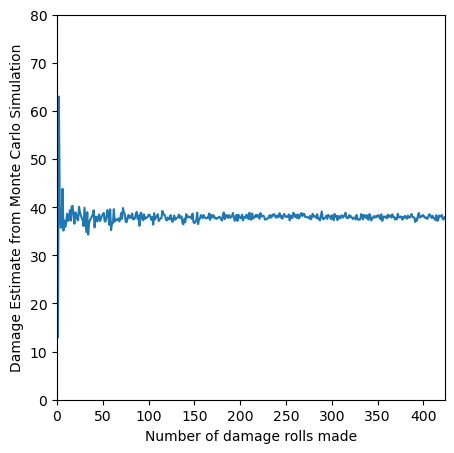

In [52]:
#This is our dice roller
def generator(sides, dice):
    roll  = [random.randint(1,sides) for i in range(1,dice+1)]
    return roll

#We will start the experiment by rolling 4 dice 
n = 4

#Initial value for my threshold to start loop; anything above 0.001 will work
threshold = 10

averages = [13, 63, 40]          #Seeding the first three rolls initialize the mean
counter  = [1,   2,  3]          #Seeding my counter with rolls 1, 2, and 3.  
while threshold > 0.001:         #Run the commands below as long as threshold is > 0.001
    counter.append(n)            #You've started the experiment; you roll "n" dice this time.
    total = []                   #Initialize a list 'total' to store results of all n rolls
    for i in range(0,n):         #Use a for loop to make n damage rolls and store the result
        roll1 = generator(12, 4) #This is your 4d12 roll
        roll2 = generator(4,  2) #This is your 2d4 roll
        base  = sum(roll1) + 5   #Adding modifier to base
        bonus = sum(roll2) + 2   #Adding modifer to bonus
        damage = base + bonus    #Result of the ith damage roll out of n damage rolls.
        total.append(damage)     #Append the ith damage total to list called 'total'
    mean_result_for_n_rolls = sum(total)/len(total)  #mean of n damage rolls after exiting

    averages.append(mean_result_for_n_rolls)  #append the mean of n rolls onto running total 
    mean_result_for_all_rolls = sum(averages)/len(averages) #Mean of every roll.

    #For threshold check the difference in the mean of "n" rolls and the mean of every roll.  
    threshold = abs(mean_result_for_all_rolls - mean_result_for_n_rolls)

    #increment number of times to make damage roll.  If threshold is > 0.001, run loop again.
    n +=1

print(f'We converge on the true mean after making {n:d} damage rolls')
print(f'The average damage calculated from this simulation is {averages[-1]:4.2f}')
print(f'We converged to within {threshold} deviation from the true mean')
plt.figure(1, figsize = (5, 5))
plt.plot(counter, averages)
plt.xlim(0, len(counter))
plt.ylim(0, 80)
plt.xlabel('Number of damage rolls made')
plt.ylabel('Damage Estimate from Monte Carlo Simulation')